# 4주차 Day3[탐색적 데이터 분석] 실습
탐색적 데이터 분석을 통해 데이터를 통달해봅시다. with Titanic Data

1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# 데이터 불러오기
titanic_df = pd.read_csv("train.csv")

## 1. 분석의 목적과 변수 확인
- 타이타닉 호에서 생존한 생존자들은 어떤 사람들일까?

In [3]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 각 column의 데이터 타입 확인하기
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기


In [6]:
# 데이터 전체 정보를 얻는 함수: .describe()
# 수치형 데이터에 대한 요약만을 제공!
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# 상관계수 확인하기
titanic_df.corr()

# Correlation is NOT Causation!! 

# 상관성: A up, B up ... 경향성을 나타내는 수치
# 인과성: A -> B 종속관계

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [9]:
# 결측치 확인하기
titanic_df.isnull().sum()

# Age, Cabin, Embarked에서 결측치 발견!

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

### I. Survived Column

In [11]:
# 생존자, 사망자 명수는?
titanic_df['Survived'].sum() # 0은 사망자, 1이 생존자이므로 다 더하면 생존자 수 

342

In [12]:
# 범주형 변수에서 각 범주의 데이터가 몇개 있는지 확인하는 방법
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

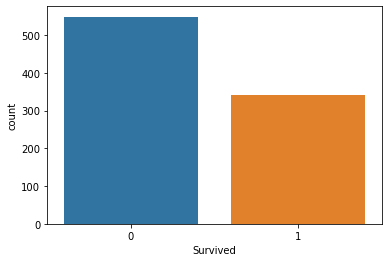

In [13]:
# 생존자수와 사망자수를 Barplot으로 그려보기 sns.countplot()
sns.countplot(x='Survived', data=titanic_df)
plt.show()

### II. Pclass

In [14]:
# Pclass에 따른 인원 파악
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
# 생존자 인원? 
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [16]:
# 생존 비율?
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


[]

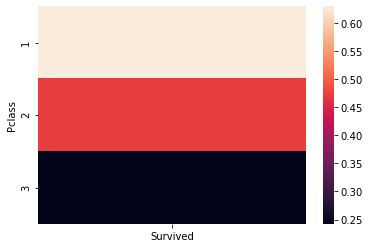

In [17]:
# 히트맵을 활용해서 pclass와 생존비율의 상관관계 파악
sns.heatmap(titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
plt.plot()

### III. Sex

In [18]:
titanic_df[['Sex', 'Survived']]

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [19]:
# 기준을 2개로 groupby
titanic_df.groupby(['Survived', 'Sex']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Survived Sex                                                                  
0        female           81      81    81   64     81     81      81    81   
         male            468     468   468  360    468    468     468   468   
1        female          233     233   233  197    233    233     233   233   
         male            109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Survived Sex                      
0        female      6        81  
         male       62       468  
1        female     91       231  
         male       45       109

In [21]:
# 성별, 생존여부에 대해 모든 경우의 수를 count
titanic_df.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

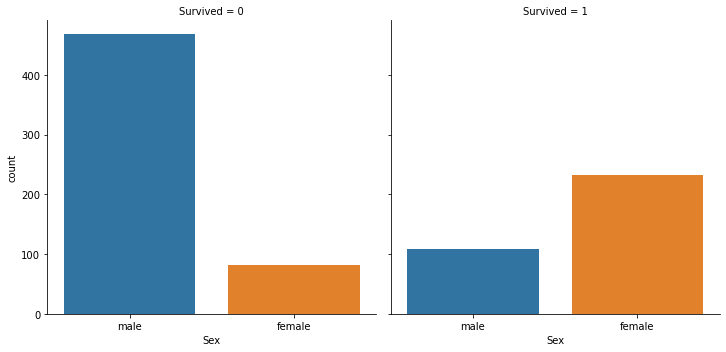

In [22]:
# sns.catplot
sns.catplot(x='Sex', col='Survived', kind='count', data=titanic_df)
plt.show()

### IV. Age
Remind: 결측치 존재!

In [24]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

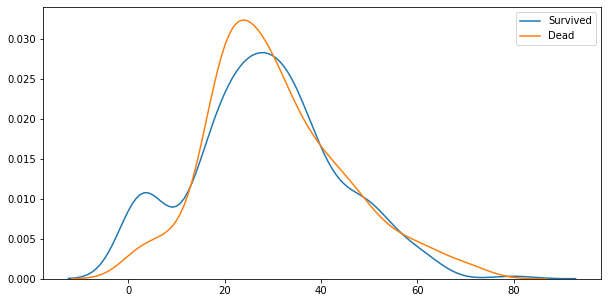

In [29]:
# survived와 age의 경향성

# 2개의 그래프 동시에 그리기
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(data=titanic_df[titanic_df.Survived==1]['Age'], ax=ax)
sns.kdeplot(data=titanic_df[titanic_df.Survived==0]['Age'], ax=ax)

plt.legend(['Survived', 'Dead'])

plt.show()

###  Appendix I. Sex + Pclass vs Survived

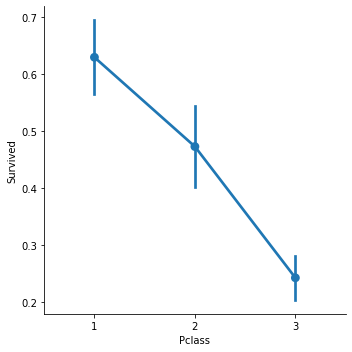

In [30]:
# pclass에 따른 survived의 추정치와 신뢰구간 파악 가능 
sns.catplot(x='Pclass', y='Survived', kind='point', data=titanic_df)
plt.show()

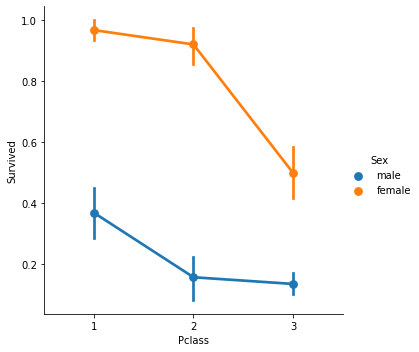

In [31]:
# 성별에 따른 그래프 확인
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=titanic_df)
plt.show()

### Appendix II. Age + Pclass

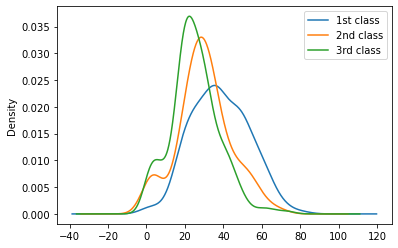

In [35]:
# Age graph with Pclass
titanic_df['Age'][titanic_df.Pclass == 1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind='kde')

plt.legend(['1st class', '2nd class', '3rd class'])
plt.show()

# 높은 클래스일수록 높은 나이대?